<a href="https://colab.research.google.com/github/satyam20-sys/Automatic-number-plate-recognition-with-PaddleOCR/blob/main/Training_the_3_OCR_models_PPOCR%2C_Tesseract_OCR_and_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'

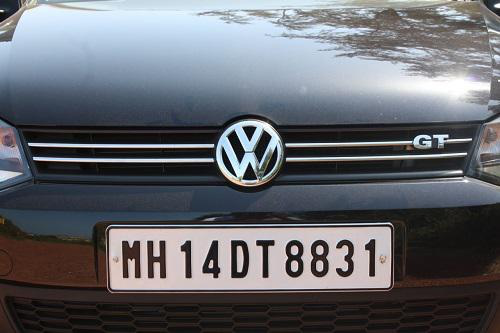

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('/content/images/N50.jpeg')
img

### PPOCR installation and import

## Image preprocessing and number plate localisation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image
## draw result method
from PIL import ImageDraw, Image, ImageFont
## Making the necessary imports
import cv2
from google.colab.patches import cv2_imshow
import os
import time
import numpy as np

In [ ]:
## First finding the number of files in the images folder
import glob
myPath = '/content/images'
jpegCounter = len(glob.glob1(myPath,"*.jpeg"))
xmlCounter = len(glob.glob1(myPath,"*.xml"))
# lst = os.listdir(directory) # your directory path
# number_files = len(lst)
print(jpegCounter)
print(xmlCounter)

In [ ]:
from skimage.segmentation import clear_border

In [ ]:
import cv2
import xml.etree.ElementTree as ET
from os import listdir
from skimage.segmentation import clear_border
from IPython.display import Image, display

myPath = '/content/images'
directed_path = '/content/new_image_folder'

for filename in listdir(myPath):
    if filename.endswith('.xml'):
        des_path = myPath + '/' + filename
        tree = ET.parse(des_path)
        root = tree.getroot()
        bndbox_elements = root.findall('.//bndbox')

        for bndbox in bndbox_elements:
            extracted_data = []
            for child in bndbox:
                extracted_data.append(child.text)

            img_filename = des_path.replace('.xml', '.jpeg')
            img_orig = cv2.imread(img_filename)

            gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

            xmin, ymin, xmax, ymax = map(int, extracted_data)

            # Extract the region of interest (ROI) from the grayscale image
            roi = gray[ymin:ymax, xmin:xmax]

            # Apply adaptive thresholding to the ROI
            _, thresholded = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

            # Clear border regions in the thresholded image
            cleared = clear_border(thresholded)

            # Invert the thresholded image
            inverted = cv2.bitwise_not(cleared)

            # Adjust contrast
            contrast = cv2.convertScaleAbs(inverted, alpha=1.5, beta=0)

            # Save the processed image
            new_filename = (directed_path + '/' + filename.split('.')[0] + "_roi." + filename.split('.')[1]).replace('.xml', '.jpeg')
            cv2.imwrite(new_filename, contrast)

            # Display the processed image
            ##display(Image(new_filename))


In [ ]:
import xml.etree.ElementTree as ET
from os import listdir
myPath = '/content/images'
directed_path = '/content/new_image_folder_2'

for filename in os.listdir(myPath):
  extracted_data = []
  if filename.endswith('.xml'):
    des_path = myPath+'/'+filename
    # print(des_path)
    tree = ET.parse(des_path)
    # Get the root element of the XML tree
    root = tree.getroot()
    bndbox_elements = root.findall('.//bndbox')
    # Extract characters within <bndbox> elements
    for bndbox in bndbox_elements:
        # Iterate over the child elements of <bndbox>
        for child in bndbox:
            # Extract the characters or data from the child elements
            extracted_data.append(child.text)

    img_filename = des_path.replace('.xml', '.jpeg')
    img_orig = cv2.imread(img_filename)

    gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

    # Print the extracted characters or data
    xmin, ymin, xmax, ymax = map(int, extracted_data)

    # Draw the bounding box rectangle
    cv2.rectangle(gray, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)


    licensePlate = gray[ymin:ymax, xmin:xmax]
    roi = cv2.threshold(licensePlate, 0, 255,
      cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    roi = clear_border(roi)
    # cv2_imshow(licensePlate)
    # cv2_imshow(roi)
    new_filename = (directed_path + '/'+ filename.split('.')[0] + "_roi." + filename.split('.')[1]).replace('.xml', '.jpeg')
    # print(new_filename)
    # cv2.imwrite(new_filename, roi)


## Training with PPOCR

In [ ]:
## FIRST doing it for a single image
sample_path = '/content/TEST/TEST.jpeg'
ocr = PaddleOCR(use_angle_cls=True, lang='en')
result = ocr.ocr(sample_path, cls=True)
result = result[0]
print(result)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:17<00:00, 234kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:18<00:00, 531kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 309kiB/s]

[2023/06/05 12:16:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

[2023/06/05 12:16:43] ppocr DEBUG: dt_boxes num : 1, elapse : 1.0723695755004883
[2023/06/05 12:16:43] ppocr DEBUG: cls num  : 1, elapse : 0.02575540542602539
[2023/06/05 12:16:43] ppocr DEBUG: rec_res num  : 1, elapse : 0.1922614574432373
[[[[339.0, 502.0], [576.0, 500.0], [576.0, 531.0], [339.0, 533.0]], ('KL51 K 4999', 0.9405127167701721)]]


## Training with Tesseract OCR




In [ ]:
import pytesseract
from PIL import Image

sample_path = '/content/new_image_folder/N164_roi.jpeg'

# Perform text recognition using Tesseract OCR
def perform_ocr_tesseract(image_path):
    # Load the image
    image = Image.open(image_path)

    # Perform text recognition using Tesseract OCR
    recognized_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

    recognized_text = ""
    confidence = 0  # Initialize confidence score

    for i, word in enumerate(recognized_data['text']):
        if word.strip() != "":
            recognized_text += f"{word} "  # Add space-separated text
            confidence = max(confidence, int(recognized_data['conf'][i]))  # Update confidence score

    recognized_text = recognized_text.strip()
    recognized_text += f"(Confidence: {confidence})"  # Append confidence score

    return recognized_text

# Call the function for Tesseract OCR
recognized_text_tesseract = perform_ocr_tesseract(sample_path)
print("Tesseract OCR recognized text:")
print(recognized_text_tesseract)



Tesseract OCR recognized text:
KG10A2555(Confidence: 11)


## Training with easy OCR


In [ ]:
# FIRST doing it for a single image
sample_path = '/content/TEST/TEST.jpeg'
import easyocr
reader = easyocr.Reader(['en']) # initialize with English language
result = reader.readtext(sample_path) # perform OCR on image path
result = result[0]
print(result)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete([[335, 501], [429, 501], [429, 537], [335, 537]], 'KL 51', 0.8719697908288615)


In [ ]:
import pytesseract
from PIL import Image
import os

directory = '/content/new_image_folder'  # Replace with the directory path containing the images

# Perform text recognition using Tesseract OCR
def perform_ocr_tesseract(image_path):
    # Load the image
    image = Image.open(image_path)

    # Perform text recognition using Tesseract OCR
    recognized_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

    recognized_text = ""
    confidence = 0  # Initialize confidence score

    for i, word in enumerate(recognized_data['text']):
        if word.strip() != "":
            recognized_text += f"{word} "  # Add space-separated text
            confidence = max(confidence, int(recognized_data['conf'][i]))  # Update confidence score

    recognized_text = recognized_text.strip()
    recognized_text += f"(Confidence: {confidence})"  # Append confidence score

    return recognized_text

# Iterate over each image in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(directory, filename)
        recognized_text_tesseract = perform_ocr_tesseract(image_path)
        print(f"File: {filename}")
        print("Tesseract OCR recognized text:")
        print(recognized_text_tesseract)
        print('-' * 30)


File: N68_roi.jpeg
Tesseract OCR recognized text:
MH ch AR S274(Confidence: 71)
------------------------------
File: N164_roi.jpeg
Tesseract OCR recognized text:
KG10A2555(Confidence: 11)
------------------------------
File: N113_roi.jpeg
Tesseract OCR recognized text:
ese5(Confidence: 0)
------------------------------
File: N231_roi.jpeg
Tesseract OCR recognized text:
(Confidence: 0)
------------------------------
File: N144_roi.jpeg
Tesseract OCR recognized text:
(Confidence: 0)
------------------------------
File: N198_roi.jpeg
Tesseract OCR recognized text:
KLO7CBE599(Confidence: 17)
------------------------------
File: N120_roi.jpeg
Tesseract OCR recognized text:
apie(Confidence: 20)
------------------------------
File: N3_roi.jpeg
Tesseract OCR recognized text:
MED TE(Confidence: 2)
------------------------------
File: N102_roi.jpeg
Tesseract OCR recognized text:
(Confidence: 0)
------------------------------
File: N85_roi.jpeg
Tesseract OCR recognized text:
"HR 26° |(Confidence:

## Fine-tuning the PPOCR model with Data Augmentation and Transfer Learning

In [ ]:
## Colored folder path
myPath = '/content/images'
directed_path = '/content/colored_img_folder'
for filename in os.listdir(myPath):
  extracted_data = []
  if filename.endswith('.xml'):
    des_path = myPath+'/'+filename
    # print(des_path)
    tree = ET.parse(des_path)
    # Get the root element of the XML tree
    root = tree.getroot()
    bndbox_elements = root.findall('.//bndbox')
    # Extract characters within <bndbox> elements
    for bndbox in bndbox_elements:
        # Iterate over the child elements of <bndbox>
        for child in bndbox:
            # Extract the characters or data from the child elements
            extracted_data.append(child.text)

    img_filename = des_path.replace('.xml', '.jpeg')
    img_orig = cv2.imread(img_filename)

    # gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

    #Print the extracted characters or data
    xmin, ymin, xmax, ymax = map(int, extracted_data)

    # Draw the bounding box rectangle
    cv2.rectangle(img_orig, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)


    roi = img_orig[ymin:ymax, xmin:xmax]
    # # roi = cv2.threshold(licensePlate, 0, 255,
    # #   cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # roi = clear_border(licensePlate)
    # # cv2_imshow(licensePlate)
    # # cv2_imshow(roi)
    new_filename = (directed_path + '/'+ filename.split('.')[0] + "_roi." + filename.split('.')[1]).replace('.xml', '.jpeg')
    # print(new_filename)
    cv2.imwrite(new_filename, roi)

In [ ]:
## Data Augmentation at final
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

folder_path = '/content/colored_img_folder'
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooms in on images
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest'  # fill in newly created pixels
)
dest_path = '/content/final_aug_dataset'
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path) # Load the image
        x = np.asarray(img) # convert image to numpy array
        x = x.reshape((1,) + x.shape)  # reshape to (1, height, width, channels)
        # x = x.reshape((1,) + x.shape)  # reshape to (1, height, width, channels)

        # Generate augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=dest_path, save_prefix='aug', save_format='jpeg'):
          i += 1
          if i >= 3:
              break
          augmented_image = Image.fromarray(batch[0].astype(np.uint8))
          augmented_image.save(os.path.join(dest_path, f'augmented_{filename}_{i}.jpeg'))

splitting the dataset

In [ ]:
import os
import random
import shutil

data_path = '/content/final_aug_dataset'  # Path to your dataset
train_ratio = 0.8  # Ratio of training data (e.g., 0.8 means 80% for training and 20% for validation)

# Create directories for training and validation data
train_data_path = '/content/training/class'  # Path to store training data
valid_data_path = '/content/testing/class'  # Path to store validation data

os.makedirs(train_data_path, exist_ok=True)
os.makedirs(valid_data_path, exist_ok=True)

# Get a list of all images in the dataset directory
image_files = [file for file in os.listdir(data_path) if file.endswith('.jpeg')]

# Shuffle the image files randomly
random.shuffle(image_files)

# Calculate the number of images for training and validation
num_train = int(len(image_files) * train_ratio)
num_valid = len(image_files) - num_train

# Copy images to the training directory
for image_file in image_files[:num_train]:
    src_path = os.path.join(data_path, image_file)
    dst_path = os.path.join(train_data_path, image_file)
    shutil.copy(src_path, dst_path)

# Copy images to the validation directory
for image_file in image_files[num_train:]:
    src_path = os.path.join(data_path, image_file)
    dst_path = os.path.join(valid_data_path, image_file)
    shutil.copy(src_path, dst_path)

print(f"Train data: {num_train} images")
print(f"Validation data: {num_valid} images")

Train data: 884 images
Validation data: 221 images


In [ ]:
import paddle
import paddle.nn as nn
import paddle.optimizer as optim
from paddle.io import Dataset, DataLoader
from paddle.vision.transforms import transforms
from paddle.vision.datasets import DatasetFolder
from paddle.vision.models import resnet50

extensions = ['.jpg', '.png', '.jpeg']
# Step 1: Prepare your training data (annotated dataset)
train_data_path = '/content/training'  # Path to your training dataset
valid_data_path = '/content/testing'  # Path to your validation dataset
num_classes = 10  # Number of number plate classes

In [ ]:
model_path = "/content/saved_models/number_plate_model.pdparams"
model = NumberPlateRecognitionModel(num_classes)
model_state_dict = paddle.load(model_path)
model.set_state_dict(model_state_dict)

In [ ]:
model.eval()


In [ ]:
transform = transforms.Compose([
 transforms.Resize((224, 224)),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_path = '/content/colored_img_folder/N100_roi.jpeg'
image = Image.open(image_path)
image = transform(image)
image = paddle.unsqueeze(image, axis=0) # Add a batch dimension

In [ ]:
output = model(image)
predicted = paddle.argmax(output, axis=1)
print("Number Plate Prediction:", predicted.item())

Number Plate Prediction: 0


In [ ]:
sample_path = '/content/images/N2.jpeg'
ocr = PaddleOCR(use_angle_cls=True, lang='en', det_model_dir="/content/saved_models/det", cls_model_dir="/content/saved_models/cls", rec_model_dir="/content/saved_models/rec")
result = ocr.ocr(sample_path, cls=True)
result = result[0]
print(result)

[2023/06/04 10:36:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/content/saved_models/det', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/content/saved_models/rec', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local/lib/python3.10/dist-packages/paddleocr/ppocr/ut

In [ ]:
import paddle
from paddle.vision.transforms import transforms
import paddleocr
from PIL import Image

# Define the path to the saved model
model_path = "/content/saved_models/number_plate_model.pdparams"

# Load the saved model
model = NumberPlateRecognitionModel(num_classes)
model_state_dict = paddle.load(model_path)
model.set_state_dict(model_state_dict)

# Set the model to evaluation mode
model.eval()

# Define the transform for the image
transform = transforms.Compose([
 transforms.Resize((224, 224)),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image_path = "/content/colored_img_folder/N100_roi.jpeg"
image = Image.open(image_path)
image = transform(image)
image = paddle.unsqueeze(image, axis=0) # Add a batch dimension

# Make a prediction
output = model(image)
predicted = paddle.argmax(output, axis=1)

# Print the predicted label
print("Number Plate Prediction:", predicted.item())

# Load the PP-OCR model for text recognition
ocr_model = paddleocr.PPStructure(lang="en", model_type="det")

# Perform text recognition on the image
ocr_results = ocr_model(image_path)

Number Plate Prediction: 0
[2023/06/04 10:26:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec